# heart_disease ctgan stacking

Training on heart_disease dataset using ctgan model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hearts data
data_real = pd.read_csv("Data\hearts_data.csv")
data_real = data_real.dropna()
gen_method = "ctgan"
target = "target"

In [33]:
# Split hearts data into 80/20 train and test
data_train, data_test = train_test_split(data_real, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv("Data\hearts_train.csv", index=False)
data_test.to_csv("Data\hearts_test.csv", index=False)

In [3]:
data_train = Load("Data\hearts_train.csv")
data_test = Load("Data\hearts_test.csv")

# syn_v1

In [12]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v1.csv", key="synth")

[2024-05-06T11:00:40.433953+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 60%|█████▉    | 1199/2000 [04:48<03:12,  4.16it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
1005   63    1                4           130          330   
224    33    1                3           120          298   
798    56    0                4           134          409   
816    77    1                4           125          304   
427    56    1                2           126          166   
...   ...  ...              ...           ...          ...   
1044   58    1                4           125          300   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
860    62    0                4           140          268   
1126   42    1                2           120          295   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1005                    1            2             132                1   
224                     0            0             185                0   
798                

# syn_v2

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v1.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v1_test.csv", index=False)


In [17]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v2.csv", key="synth")

[2024-05-06T11:21:10.575194+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 30%|██▉       | 599/2000 [05:03<11:50,  1.97it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2121   38    1                3           120          212   
457    61    1                3           120            0   
1738   58    1                4           144          312   
883    44    1                2           120          263   
2279   52    1                2           135          261   
...   ...  ...              ...           ...          ...   
1638   49    0                4           121          252   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
1294   34    1                3           124          228   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2121                    0            0             169                0   
457                     0            0              80                1   
1738               

# syn_v3

In [10]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v2.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v2_test.csv", index=False)


In [19]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v3.csv", key="synth")

[2024-05-06T11:26:15.478608+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 30%|██▉       | 599/2000 [16:08<37:44,  1.62s/it]  


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
624    59    1                4           110          239   
4522   58    1                3           129          266   
4227   47    0                3           128          283   
3135   51    0                3           110          182   
1554   37    1                4           142          186   
...   ...  ...              ...           ...          ...   
4426   40    0                2            91          208   
466    42    1                3           134          240   
3092   42    1                4           131          202   
3772   47    1                4           102          230   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
624                     0            2             142                1   
4522                    1            0             130                0   
4227               

# syn_v4

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v3.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v3_test.csv", index=False)

In [21]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v4.csv", key="synth")

[2024-05-06T11:42:26.068286+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 20%|█▉        | 399/2000 [21:23<1:25:51,  3.22s/it]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2484   61    1                4           180          240   
3016   60    0                3           131          250   
5292   38    0                4           121          265   
7932   61    1                4           116          248   
4734   64    1                4           121            1   
...   ...  ...              ...           ...          ...   
5734   45    1                4           167          235   
5191   44    1                4           142          208   
5390   63    1                1           157          224   
860    62    0                4           140          268   
7270   51    1                4           124          211   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2484                    0            2             162                1   
3016                    0            0             131                0   
5292               

# syn_v5

In [12]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v4.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v4_test.csv", index=False)

In [23]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v5.csv", key="synth")

[2024-05-06T12:03:53.814621+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 22%|██▏       | 449/2000 [1:02:18<3:35:13,  8.33s/it]


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
2006    54    1                3           129            0   
1288    39    1                3           121          245   
18494   56    0                3           121          221   
15527   57    0                2           109          218   
12341   39    1                4           141          227   
...    ...  ...              ...           ...          ...   
11284   60    1                4           141          233   
11964   60    1                4           131          232   
5390    63    1                1           157          224   
860     62    0                4           140          268   
15795   61    0                3           109          221   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2006                     1            0             128                0   
1288                     0            0             151                0   
1849

# stack_v5 - Final stack

In [13]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v5.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v5_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(data_train).Train(plugin=gen_method)

[2024-05-08T09:19:01.870403+0200][2108][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 17%|█▋        | 349/2000 [59:28<4:41:19, 10.22s/it]


# stack_v5 (synth only)

In [15]:
# Remove first 1190 rows, equal to the real data, from stack_v5
data_stack_synth_only = data_stack.iloc[1190:,:]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\hearts_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(data_train).Train(plugin=gen_method)

[2024-05-08T10:18:45.755452+0200][2108][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 25%|██▍       | 499/2000 [1:11:09<3:34:01,  8.56s/it]


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
22594   51    1                1           148            0   
1510    53    1                4           157          288   
26995   40    1                2           120          234   
14320   46    1                4           110          231   
34943   59    1                4           129          270   
...    ...  ...              ...           ...          ...   
16850   52    1                4           140          157   
6265    41    1                3           108          203   
11284   60    1                4           141          233   
860     62    0                4           140          268   
15795   61    0                3           109          221   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
22594                    0            0             107                1   
1510                     1            0             161                0   
2699

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
19876   53    0                4           139          253   
6191    52    1                3           112            0   
3687    41    1                4           119          247   
1440    56    1                4           116            0   
28826   41    1                4           130          233   
...    ...  ...              ...           ...          ...   
18040   59    1                4           115            0   
7455    43    1                3           161          194   
12474   60    1                3           128          243   
2050    55    1                4           158          267   
16985   40    1                3           121          240   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
19876                    1            1             171                0   
6191                     0            0             125                0   
3687

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [4]:
# Read train and test data (this is base/real train and test data, not the stack data)
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Count of data_real
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.023825,0.002968,0.976175,0.002968
1,pca_eigval_diff,u,0.052905,NaN,0.947095,NaN
2,pca_eigvec_ang,u,0.181732,NaN,0.942153,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.379164,NaN,0.994255,NaN
5,mutual_inf_diff,u,0.393504,NaN,0.994038,NaN
6,ks_tvd_stat,u,0.077199,0.018163,0.922801,0.018163
7,frac_ks_sigs,u,0.583333,NaN,0.416667,NaN
8,avg_h_dist,u,0.014733,0.004943,0.985267,0.004943
9,avg_pMSE,u,0.016512,0.000739,0.933951,0.002956


# Eval on syn_2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.025291,0.002889,0.974709,0.002889
1,pca_eigval_diff,u,0.015188,NaN,0.984812,NaN
2,pca_eigvec_ang,u,0.156567,NaN,0.950163,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.340289,NaN,0.994844,NaN
5,mutual_inf_diff,u,0.511148,NaN,0.992255,NaN
6,ks_tvd_stat,u,0.084623,0.013326,0.915377,0.013326
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.025540,0.008335,0.974460,0.008335
9,avg_pMSE,u,0.016990,0.001170,0.932038,0.004681


# Eval on syn_3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.031896,0.002907,0.968104,0.002907
1,pca_eigval_diff,u,0.011802,NaN,0.988198,NaN
2,pca_eigvec_ang,u,0.132738,NaN,0.957748,NaN
3,avg_cio,u,0.089870,0.089870,0.089870,0.089870
4,corr_mat_diff,u,0.445483,NaN,0.993250,NaN
5,mutual_inf_diff,u,0.595879,NaN,0.990972,NaN
6,ks_tvd_stat,u,0.091724,0.021164,0.908276,0.021164
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.019502,0.005996,0.980498,0.005996
9,avg_pMSE,u,0.026163,0.000950,0.895348,0.003799


# Eval on syn_4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.030290,0.002852,0.969710,0.002852
1,pca_eigval_diff,u,0.006638,NaN,0.993362,NaN
2,pca_eigvec_ang,u,0.128936,NaN,0.958958,NaN
3,avg_cio,u,0.148323,0.148323,0.148323,0.148323
4,corr_mat_diff,u,0.401589,NaN,0.993915,NaN
5,mutual_inf_diff,u,0.699480,NaN,0.989402,NaN
6,ks_tvd_stat,u,0.105215,0.028075,0.894785,0.028075
7,frac_ks_sigs,u,0.750000,NaN,0.250000,NaN
8,avg_h_dist,u,0.021303,0.007065,0.978697,0.007065
9,avg_pMSE,u,0.028990,0.000647,0.884042,0.002589


# Eval on syn_5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.036089,0.002857,0.963911,0.002857
1,pca_eigval_diff,u,0.024649,NaN,0.975351,NaN
2,pca_eigvec_ang,u,0.071695,NaN,0.977179,NaN
3,avg_cio,u,0.025507,0.025507,0.025507,0.025507
4,corr_mat_diff,u,0.593582,NaN,0.991006,NaN
5,mutual_inf_diff,u,0.772235,NaN,0.988299,NaN
6,ks_tvd_stat,u,0.110515,0.030931,0.889485,0.030931
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.021661,0.005921,0.978339,0.005921
9,avg_pMSE,u,0.032612,0.001016,0.869552,0.004062


# Eval on stack_v5 to real data

In [13]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_v5_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v5 = S.evaluate(data_syn,target,"full_eval")
res_stack_v5

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.028973,0.002870,0.971027,0.002870
1,pca_eigval_diff,u,0.027991,NaN,0.972009,NaN
2,pca_eigvec_ang,u,0.205478,NaN,0.934594,NaN
3,avg_cio,u,0.011982,0.011982,0.011982,0.011982
4,corr_mat_diff,u,0.486791,NaN,0.992624,NaN
5,mutual_inf_diff,u,0.765773,NaN,0.988397,NaN
6,ks_tvd_stat,u,0.108707,0.023630,0.891293,0.023630
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.023811,0.006785,0.976189,0.006785
9,avg_pMSE,u,0.027622,0.001150,0.889511,0.004601


# Eval on stack_synth_only to real data

In [14]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_synth_only_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.044473,0.002889,0.955527,0.002889
1,pca_eigval_diff,u,0.035591,NaN,0.964409,NaN
2,pca_eigvec_ang,u,0.168512,NaN,0.946361,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.551266,NaN,0.991647,NaN
5,mutual_inf_diff,u,0.786137,NaN,0.988089,NaN
6,ks_tvd_stat,u,0.114520,0.020588,0.885480,0.020588
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.030679,0.009649,0.969321,0.009649
9,avg_pMSE,u,0.040499,0.002453,0.838004,0.009814


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

# Save to csv
privacy_plot.to_csv(f"{gen_method}\privacy_plot.csv")

privacy_plot

,eps_identif_risk,att_discl_risk,mia_cls_risk
res_real,0.159664,0.478501,0.994958
res_stack_v1,0.048319,0.454272,0.868908
res_stack_v2,0.030462,0.450420,0.559664
res_stack_v3,0.035714,0.441877,0.317647
res_stack_v4,0.034664,0.443627,0.295798
res_stack_v5,0.023109,0.452031,0.341176
res_stack_synth_only,0.024160,0.446919,0.166387


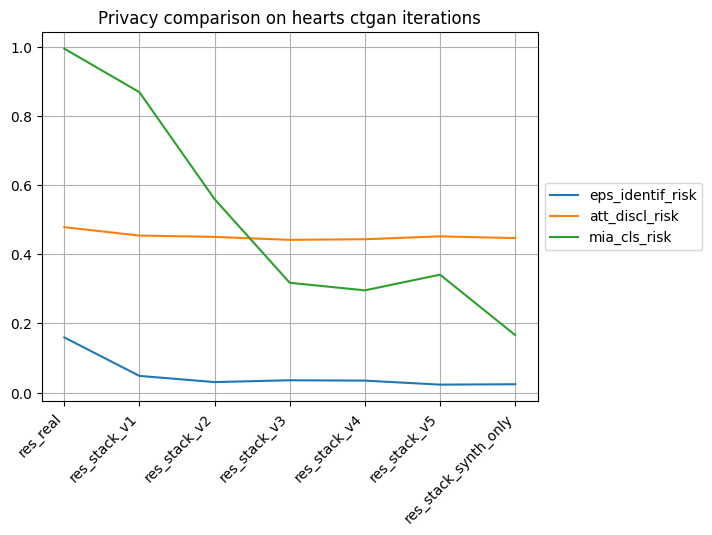

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on hearts ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

# Save to csv
DCR_plot.to_csv(f"{gen_method}\DCR_plot.csv")

DCR_plot

,median_DCR
res_real,2.488962
res_stack_v1,3.989395
res_stack_v2,4.704113
res_stack_v3,4.739812
res_stack_v4,4.855394
res_stack_v5,5.498536
res_stack_synth_only,5.605949


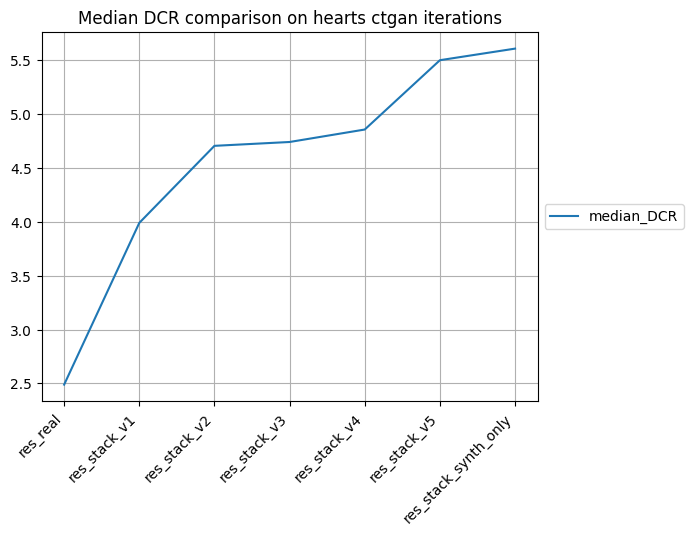

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on hearts ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "avg_pMSE",
                                     "cls_F1_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["avg_pMSE", "val"],
                                    evals.loc["cls_F1_diff", "val"]]


utility_plot

,avg_dwm_diff,avg_pMSE,cls_F1_diff
res_real,0.023825,0.016512,0.062253
res_stack_v1,0.025291,0.016990,0.081130
res_stack_v2,0.031896,0.026163,0.088249
res_stack_v3,0.030290,0.028990,0.085525
res_stack_v4,0.036089,0.032612,0.102155
res_stack_v5,0.028973,0.027622,0.097944
res_stack_synth_only,0.044473,0.040499,0.083541


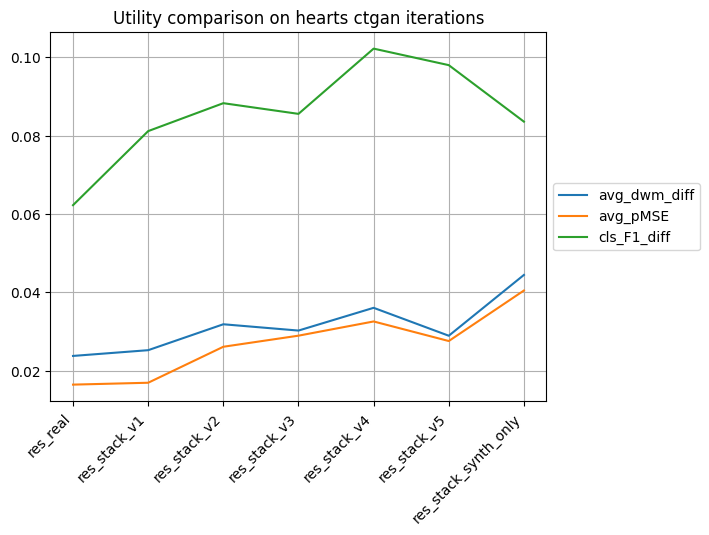

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on hearts ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"]]

# Save to csv
matrix_diff_plot.to_csv(f"{gen_method}\matrix_diff_plot.csv", index=False)

matrix_diff_plot

,corr_mat_diff
res_real,0.379164
res_stack_v1,0.340289
res_stack_v2,0.445483
res_stack_v3,0.401589
res_stack_v4,0.593582
res_stack_v5,0.486791
res_stack_synth_only,0.551266


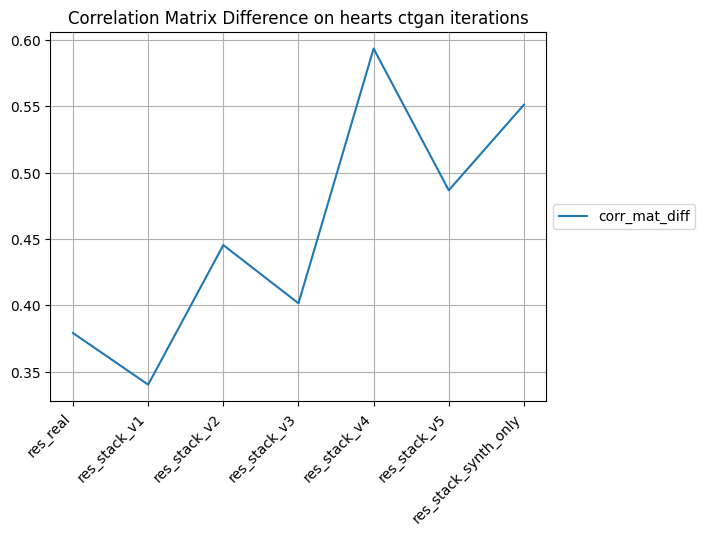

In [24]:
matrix_diff_plot.plot.line()
plt.title("Correlation Matrix Difference on hearts ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.023825,0.052905,0.181732,0.000000,0.379164,0.393504,0.077199,0.583333,0.014733,0.016512,...,-0.017366,0.782563,-0.153011,0.062253,0.036765,0.005616,0.0,0.159664,0.994958,0.478501
res_stack_v1,0.025291,0.015188,0.156567,0.000000,0.340289,0.511148,0.084623,0.833333,0.025540,0.016990,...,-0.004405,0.845903,-0.212500,0.081130,0.047269,0.011069,0.0,0.048319,0.868908,0.454272
res_stack_v2,0.031896,0.011802,0.132738,0.089870,0.445483,0.595879,0.091724,0.666667,0.019502,0.026163,...,0.012292,0.898739,-0.193137,0.088249,0.022059,0.008342,0.0,0.030462,0.559664,0.450420
res_stack_v3,0.030290,0.006638,0.128936,0.148323,0.401589,0.699480,0.105215,0.750000,0.021303,0.028990,...,-0.004263,0.914286,-0.185294,0.085525,0.075630,0.003217,0.0,0.035714,0.317647,0.441877
res_stack_v4,0.036089,0.024649,0.071695,0.025507,0.593582,0.772235,0.110515,0.833333,0.021661,0.032612,...,0.005439,0.901155,-0.173704,0.102155,0.051471,0.001472,0.0,0.034664,0.295798,0.443627
res_stack_v5,0.028973,0.027991,0.205478,0.011982,0.486791,0.765773,0.108707,0.833333,0.023811,0.027622,...,-0.002184,0.912500,-0.151716,0.097944,0.027311,0.004580,0.0,0.023109,0.341176,0.452031
res_stack_synth_only,0.044473,0.035591,0.168512,0.000000,0.551266,0.786137,0.114520,0.833333,0.030679,0.040499,...,0.014102,0.916176,-0.171359,0.083541,0.045168,0.002617,0.0,0.024160,0.166387,0.446919


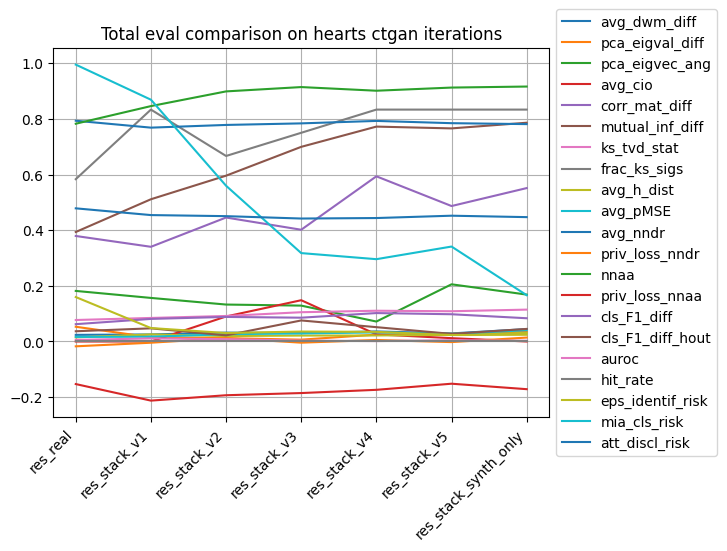

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on hearts ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

# Save to csv
overall_res.to_csv(f"{gen_method}\overall_res.csv", index=False)

overall_res

,Stacks,Utility,Privacy
0,res_real,0.801800,0.747019
1,res_stack_v1,0.778568,0.772426
2,res_stack_v2,0.792015,0.816508
3,res_stack_v3,0.784467,0.849859
4,res_stack_v4,0.769217,0.854912
5,res_stack_v5,0.767997,0.851786
6,res_stack_synth_only,0.761286,0.869775


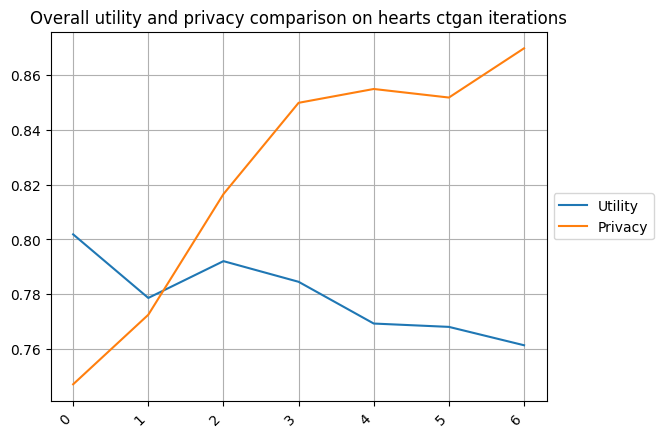

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on hearts ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()